# tilemapbaseの基本的な使い方を試す

まずは[本家のexample](https://github.com/MatthewDaws/TileMapBase/blob/master/notebooks/Example.ipynb)を写経

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import tilemapbase
tilemapbase.start_logging()

/usr/local/lib/python3.8/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.8/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.8/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.8/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


最初に一回だけ必要なおまじない

In [4]:
tilemapbase.init(create=True)

In [5]:
t = tilemapbase.tiles.build_OSM()

描画の範囲を定義する

In [6]:
my_office = (139.74947495, 35.66687568)
degree_range = 0.003
extent = tilemapbase.Extent.from_lonlat(
    my_office[0] - degree_range, my_office[0] + degree_range,
    my_office[1] - degree_range, my_office[1] + degree_range
)
extent = extent.to_aspect(1)
extent

Extent((0.8881846526388889,0.3938187783308366)->(0.8882013193055555,0.39383544499750317) projected as normal)

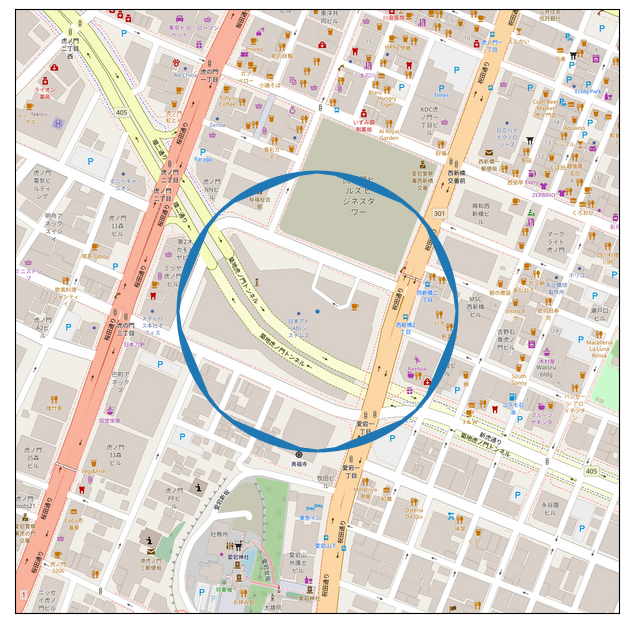

In [7]:
fig, ax = plt.subplots(figsize=(8,8), dpi=100)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

plotter = tilemapbase.Plotter(extent, t, width=600)
plotter.plot(ax, t)

x,y = tilemapbase.project(*my_office)
ax.scatter(x, y, marker=".", linewidth=200)
None

## まとめ

### 図形を描く手順

1. おまじないをする
1. build_OSMオブジェクトを作成する
1. extentで描画の範囲を定義する
1. Plotterオブジェクトを作成
1. lon, lat→x, yに変換
1. あとは、通常のmatplotlib

という感じ

ということは、matplotlibで多角形を描いて色を塗る方法が分かれば、ヒートマップが描ける